# Assignment 2 : Jouksowski Transformation


## Introduction 
Complex analysis was used to study potential flows without directly solving partial differential governing equation 

We will learn how to obtain potential flow over an airfoil starting with the flow over a cylinder and conformal mapping **JOUKOWSKI TRANSFORMATION**


## Complex numbers! 

In python: j is the square root of negative 1 *not* i 


In [19]:
#importing necessary libraries 
import math
import numpy
import cmath #complex math!
from matplotlib import pyplot

#embed the figures inline
%matplotlib inline


In [20]:
3 + 2j

(3+2j)

In [21]:
a= 3
b=3 
z = a + b*1j
print('z= ', z)
print('The type of the variable is ', type(z))

z=  (3+3j)
The type of the variable is  <class 'complex'>


**1. Exercises Getting Used to Using Complex Number on Python**

This is a graded exercise on the OpenEdX page

In [22]:
#getting familiar with the complex number operation in Python 
(2.75  + 3.69*1j)*(8.55-6.13*1j)

(46.1322+14.692000000000004j)

This multiplied using the "foil method" and multiplied the different components 


In [23]:
1.4*cmath.exp(5.32j)

(0.799270785858235-1.1494199453957457j)

This applied the Euler method

In [24]:
(7.51-9.15j)/(4.43+9.64j)

(-0.4880897698448308-1.0033441577191493j)

** 2. Shaped Created by the Joukowski Transformation**

We want to write a function that takes *z* and *c* as parameters and returns the Joukowski Transformation of *z*

In [25]:
def joukowski_trans(z,c):
    """
    Parameters 
    z = complex number in the form of x + yj
    c = some constant (real) 
    
    
    Returns 
    eta: also a complex number mapped from z and c
    """
    eta = z + c**2/z
    return eta 

In [26]:
# Defining the circle and calculating z 
c=1.0
R = 1.5 
theta = numpy.linspace(0,2*math.pi, 100)
z = R*numpy.cos(theta) + 1j*R*numpy.sin(theta)

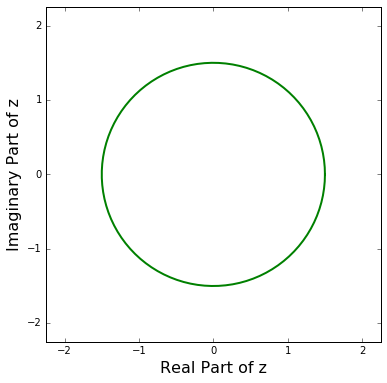

In [27]:
# plotting the circle before the transformation 
size = 6 
pyplot.figure(figsize=(size,size))
pyplot.xlabel('Real Part of z', fontsize=16)
pyplot.ylabel('Imaginary Part of z', fontsize=16)
pyplot.xlim(-R*1.5, R*1.5)
pyplot.ylim(-R*1.5, R*1.5)
pyplot.plot(z.real,z.imag, color='g',linewidth =2, linestyle='-');

In [28]:
# applying the Joukowski Transformation to the circle 
eta_circle = joukowski_trans(z,c)

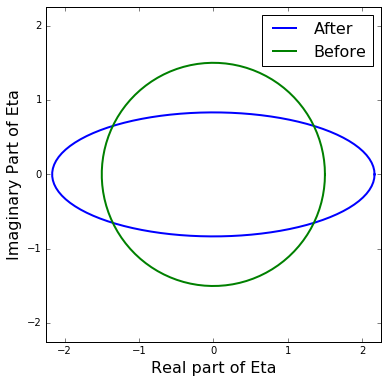

In [29]:
## Plotting the new transformed shape from the transformation 
size = 6 
pyplot.figure(figsize=(size,size))
pyplot.xlabel('Real part of Eta', fontsize = 16)
pyplot.ylabel('Imaginary Part of Eta', fontsize =16)
pyplot.xlim(-R*1.5, R*1.5)
pyplot.ylim(-R*1.5, R*1.5)
pyplot.plot(eta_circle.real, eta_circle.imag, label ='After', color ='b', linewidth=2, linestyle='-')
pyplot.plot(z.real,z.imag, label= 'Before',color='g',linewidth =2, linestyle='-');
pyplot.legend(loc='best', prop={'size':16});

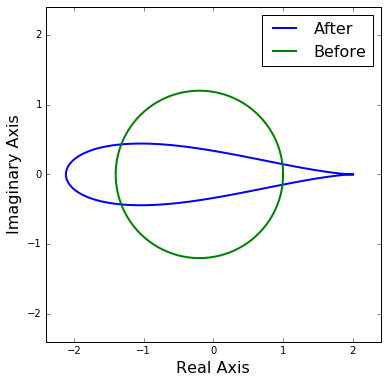

In [30]:
# Defining a new Circle for the next exercise, centered a (c-R,0) 
c = 1
R = 1.2
z = R*numpy.cos(theta)+(c-R)+R*numpy.sin(theta)*1j

# calculating the transformation
eta = joukowski_trans(z,c)

#plotting the before and after 
size = 6 
pyplot.figure(figsize=(size,size))
pyplot.xlabel('Real Axis', fontsize = 16)
pyplot.ylabel('Imaginary Axis', fontsize =16)
pyplot.xlim(-R*2, R*2)
pyplot.ylim(-R*2, R*2)
pyplot.plot(eta.real, eta.imag, label ='After', color ='b', linewidth=2, linestyle='-')
pyplot.plot(z.real,z.imag, label= 'Before',color='g',linewidth =2, linestyle='-');
pyplot.legend(loc='best', prop={'size':16});

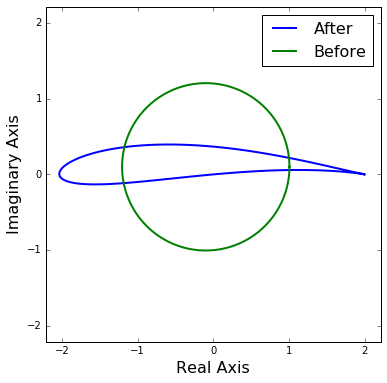

In [31]:
# Another exercise in Joukowski Transformations 
delta_x = -0.1 
delta_y = 0.1

#Calculating the radius according to the problem specifics
R = math.sqrt((c-delta_x)**2+(delta_y)**2)

#Calculating the z coordinates 
z = R*numpy.cos(theta)+delta_x + (R*numpy.sin(theta)+delta_y)*1j

# Joukowski Transformation
eta = joukowski_trans(z,c)

#plotting 
#plotting the before and after 
size = 6 
pyplot.figure(figsize=(size,size))
pyplot.xlabel('Real Axis', fontsize = 16)
pyplot.ylabel('Imaginary Axis', fontsize =16)
pyplot.xlim(-R*2, R*2)
pyplot.ylim(-R*2, R*2)
pyplot.plot(eta.real, eta.imag, label ='After', color ='b', linewidth=2, linestyle='-')
pyplot.plot(z.real,z.imag, label= 'Before',color='g',linewidth =2, linestyle='-');
pyplot.legend(loc='best', prop={'size':16});

**3. Grid points on the z-plane using polar coordinates**


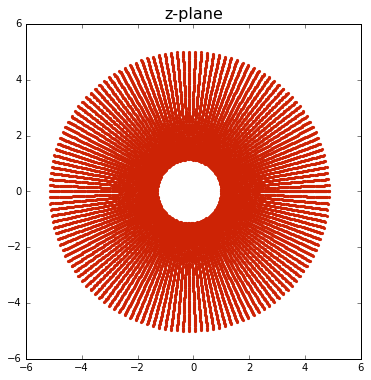

In [32]:
# defining coordinates 
xc = -0.15
yc = 0 
R = 1.15
c = 1 

# Discritizing the coordinates 
Nr = 100
r = numpy.linspace(R, 5, Nr)
Ntheta = 145 
theta = numpy.linspace(0,2*math.pi,Ntheta) 

r_tot, theta_tot = numpy.meshgrid(r,theta)

# calculating the z coordinates
z = r_tot*numpy.cos(theta_tot)+xc + 1j*(r_tot*numpy.sin(theta_tot)+yc)

# calculating the transformtion
eta = joukowski_trans(z,c)

#Plotting to Visualize the scatter plots in the z-plane
size = 6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('z-plane', fontsize=16);
pyplot.scatter(z.real,z.imag,s=10,color='#CD2305',marker='o',linewidth=0);


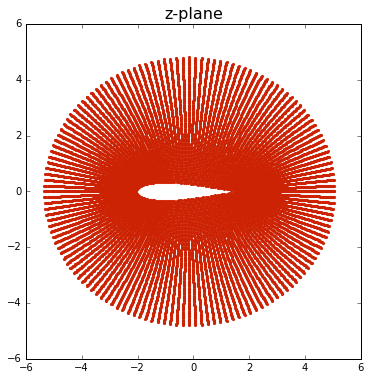

In [33]:
#plotting to visualize the scatter plots in the eta plane 
size = 6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('z-plane', fontsize=16);
pyplot.scatter(eta.real,eta.imag,s=10,color='#CD2305',marker='o',linewidth=0);


**4. Flow over  a symmetric Joukowski airfoil with zero angle of attack **

We are going to evaluate the flow over these shapes using a free stream velocity 

1. *Stream function and streamlines*

In [34]:
# define the freestream velocity 
u_inf = 1.0 
psi_freestream = u_inf*z.imag

# to have a R = 1.15, we need to calculate what the strength of the doublet should be 
strength = 2*math.pi*u_inf*R**2

# define a function to get the velocity of the doublet 
def get_velocity_doublet(strength,xd,yd,X,Y):
    """
    returns the velocity field generated by a doublet 
    
    Parameters
    ----------
    strength(float): strength of the doublet
    xd(float): x-coordinate of the doublet
    yd(float): y-coordinate of the doublet 
    X(2D Numpy array of floats): x-coordinate mesh points 
    Y(2D Numpy array of floats): y-coordinate mesh points 
    
    Returns
    --------
    u(2D Numpy array of floats): x-component of the velocity vector field
    v(2D Numpy array of floats): y-component of the velocity vector field 
    
    """
    
    u = -strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = -strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u,v 

def get_stream_function_doublet(strength,xd,yd,X,Y):
    """
    Returns the stream-function generated by a doublet. 
    
    Parameters
    ----------
    strength(float): strength of the doublet 
    xd(float): x-coordinate of a doublet 
    yd(float): y-coordinate of a doublet 
    X(2D Numpy array of floats): x-coordinate of the mesh points
    Y(2D Numpy array of floats): y coordinate of the mesh points 
    
    Returns 
    -------
    psi(2D Numpy array or floats): The stream function
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi

strength

8.309512568745001

The stream function has mapped points to the eta plane. The stream function that was calculated in the for a certain point at the z-plane can simply be plotted except with the coordinates of the eta plane. 
Psi(eta) = Psi(eta(z)) 

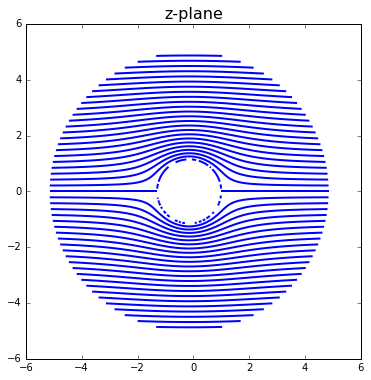

In [36]:
# Calculating the streamfunction 
psi_z = get_stream_function_doublet(strength, xc,yc,z.real,z.imag)
Psi = psi_freestream +psi_z
# plotting the stream functions for the flow around the cylinder on the z-plane 
size =6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('z-plane', fontsize=16)
pyplot.contour(z.real, z.imag, Psi, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');

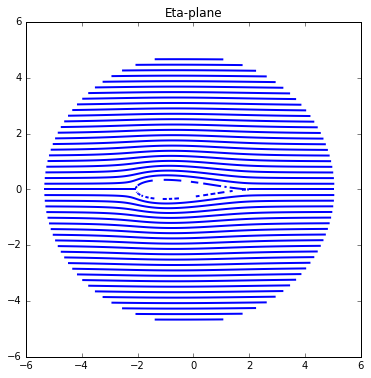

In [37]:
# plotting the streamlines around the airfoil on the eta-plane 
size =6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('Eta-plane')
pyplot.contour(eta.real, eta.imag, Psi, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');

2. *Velocity vectors and pressure coefficients *

Unlines the the stream function, we **CANNOT** say that the velocity at the corresponding points on the eta-plane are the same as those on z-plane

The stream function remains the same on the original and the mapped point because the stream function is a scaler solution of Laplace's equation

Velocity is not a solution of the laplace's equation the coorsinates change with a transformation 



In [38]:
# calculating the doublet velocity field for z plane 
u_z, v_z = get_velocity_doublet(strength,xc,yc,z.real,z.imag)
psi_z = get_stream_function_doublet(strength,xc,yc,z.real,z.imag)


#calculating the velocity componenets on the z-plane 
U = u_inf + u_z
V = v_z


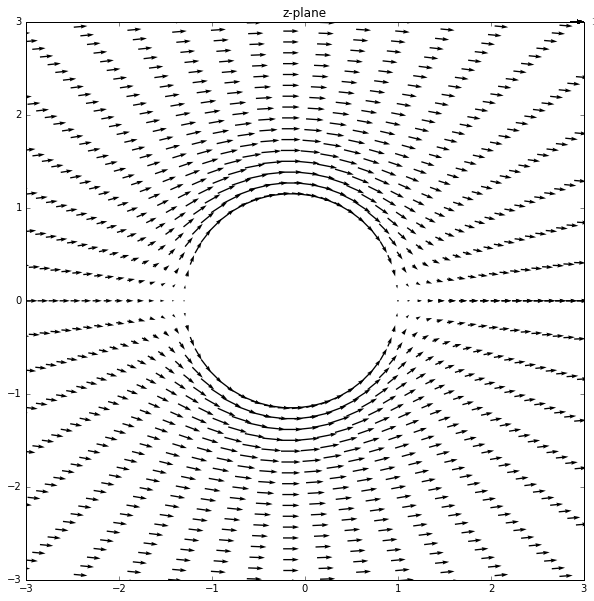

In [73]:


X = z.real
Y = z.imag

size = 10
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.title('z-plane')
Q = pyplot.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
               pivot='mid', scale_units='xy', scale=7)
qk = pyplot.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

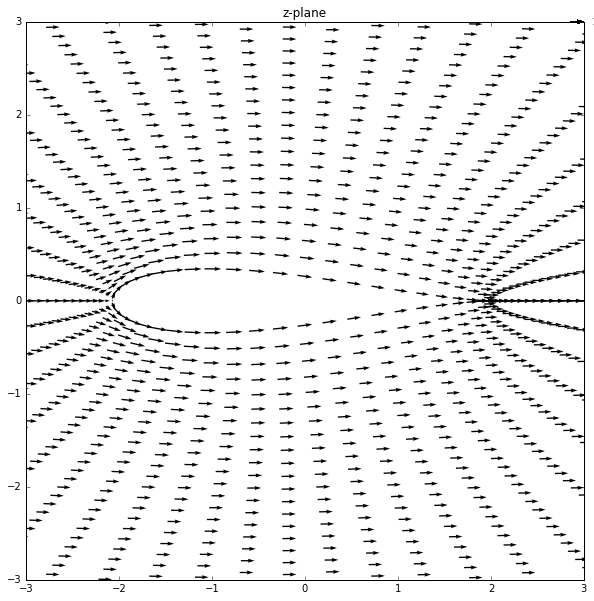

In [78]:
# Mapping Velocity Coordinates to eta-plane 
W = (U- 1j*V)/(1-(c/z)**2)

U_eta = W.real
V_eta = -W.imag # This comes from the fact that (u-iv)

X_eta = eta.real
Y_eta= eta.imag

size = 10
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.title('z-plane')
Q = pyplot.quiver(X_eta[::3, ::3], Y_eta[::3, ::3], U_eta[::3, ::3], V_eta[::3, ::3],
               pivot='mid', scale_units='xy', scale=7)
qk = pyplot.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')


** Calculating the 62nd point velocity on the airfoil

In [79]:
# Calculating the Questions to the OpexEdx 
t=theta[61]
t

2.6616271092913526

In [84]:
x_62 = R*numpy.cos(t)+xc
x_62

-1.1700624581549548

In [86]:
y_62 = R*numpy.sin(t)+yc
y_62

0.53101090522028893

In [87]:
z_62 = x_62 + 1j*y_62
numpy.where(z==z_62)

(array([61]), array([0]))

In [88]:
eta_62 = joukowski_trans(z_62,c)
numpy.where(eta==eta_62)

(array([61]), array([0]))

In [89]:
U_eta[61,0]

1.1063384662852436

In [90]:
V_eta[61,0]

0.52363334929849692

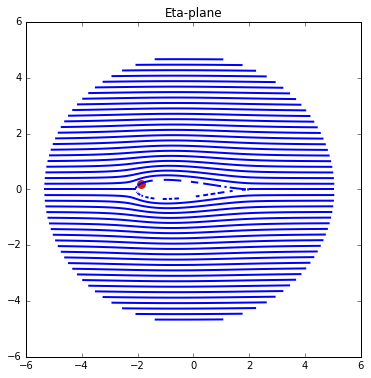

In [91]:
# plotting the streamlines around the airfoil on the eta-plane with the 62 point highlighted
size =6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('Eta-plane')
pyplot.contour(eta.real, eta.imag, Psi, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->')
pyplot.scatter(eta_62.real, eta_62.imag, s=80,color='#CD2305',marker='o',linewidth=0);

** Pressure Coefficient**

In [92]:
# Pressure coeffcient for z-plane 
X = z.real
Y = z.imag
Cp = 1.0 - ((U**2+V**2)/u_inf**2)

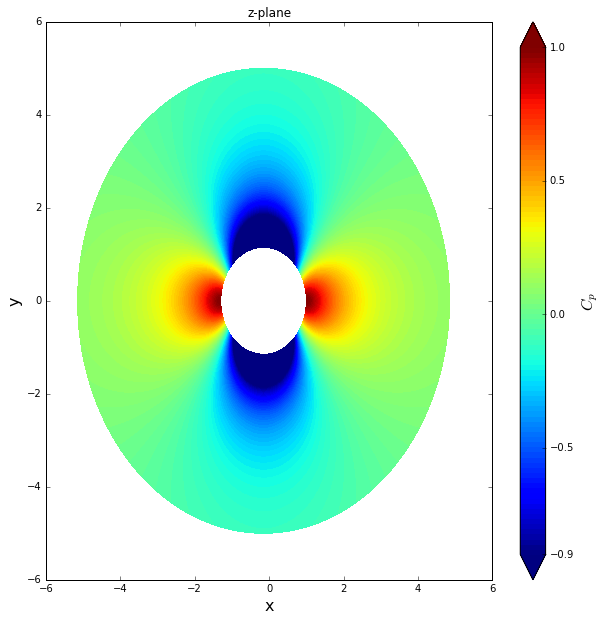

In [93]:

# plot the pressure coefficient field 
size=10 
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y',fontsize =16) 
pyplot.xlim(-6,6)
pyplot.ylim(-6,6) 
pyplot.title('z-plane')
contf = pyplot.contourf(X,Y,Cp,levels=numpy.linspace(-0.9, 1.0, 100), extend='both') 
cbar= pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.9,-0.5,0.0, 0.5, 1.0]);


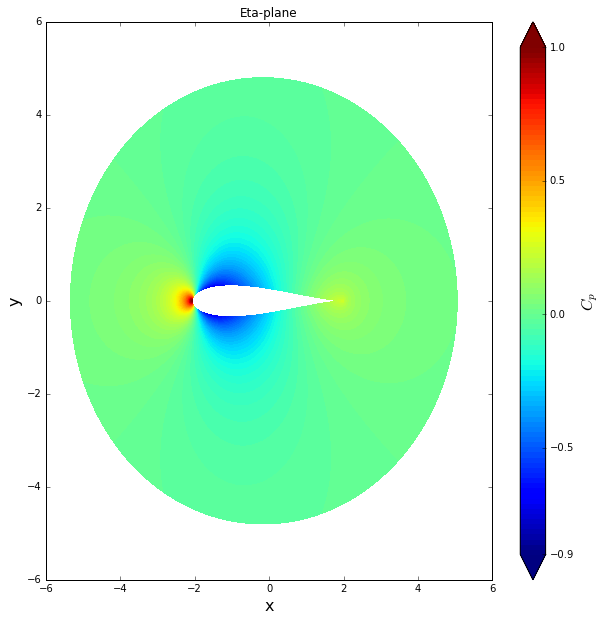

In [95]:
# Pressure coeffcient for z-plane 
Cp = 1.0 - ((U_eta**2+V_eta**2)/u_inf**2)

# plot the pressure coefficient field 
size=10 
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y',fontsize =16) 
pyplot.xlim(-6,6)
pyplot.ylim(-6,6) 
pyplot.title('Eta-plane')
contf = pyplot.contourf(X_eta,Y_eta,Cp,levels=numpy.linspace(-0.9, 1.0, 100), extend='both') 
cbar= pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.9,-0.5,0.0, 0.5, 1.0]);

In [96]:
#minimum pressure coefficient on the surface of the airfoil
numpy.min(Cp)

-0.68775567409240423

Completed the exercises at the bottom of Part 4

1. What is the strength of the doublet? 8.31 
2. what is the velocity at the 62nd point on the airfoil surface?
    - u = 1.11
    - v = 0.52 
3. What is the minimum value of the pressure coefficient on the airfoil surface?
    - -0.69 


** 5. Flow over a symmetric Joukowski airfoil with non-zero angle of attacke without circulation**

We need to rotate the coordinate system because we cannot just superimpose a non-zero inlet angle and a doublet to obtain what we want 

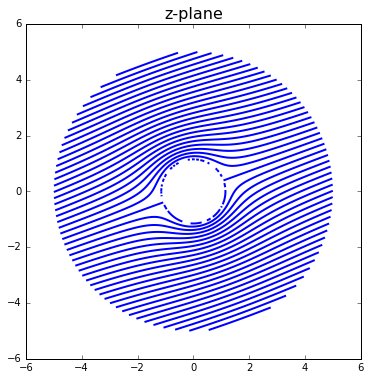

In [162]:
AoA = 20.0*(math.pi/180) #this is in degrees 
z_prime = (z- (xc+1j*yc))*cmath.exp(-1j*AoA)

x_doublet, y_doublet = 0.0, 0.0 

psi_AoA = get_stream_function_doublet(strength, x_doublet, y_doublet, z.real, z.imag)
psi_freestream*z_prime.imag
psi =psi_freestream + psi_AoA

# plotting the stream functions for the flow around the cylinder on the z-plane 
size =6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('z-plane', fontsize=16)
pyplot.contour(z_prime.real, -z_prime.imag, Psi, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');

#plotting a red circle for the shape 
x_circle = R*numpy.cos(theta)+xc
y_circle = R*numpy.sin(theta)
z_circle = x_circle+1j*y_circle

#pyplot.plot(x_circle, y_circle, color ='g', linewidth=2, linestyle='-');

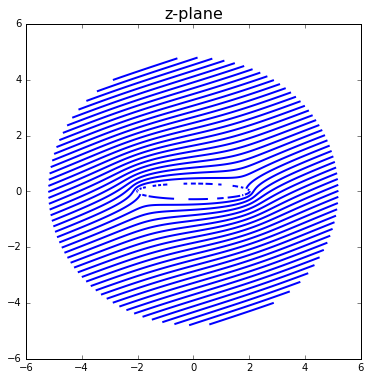

In [148]:
eta_prime = joukowski_trans(z_prime,c)

# plotting the stream functions for the flow around the cylinder on the z-plane 
size =6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('z-plane', fontsize=16)
pyplot.contour(eta_prime.real, -eta_prime.imag, Psi, 50, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');

#eta_shape = joukowski_trans(z_circle,c)
#pyplot.plot(eta_shape.real, eta_shape.imag, color ='k', linewidth=2, linestyle='-');

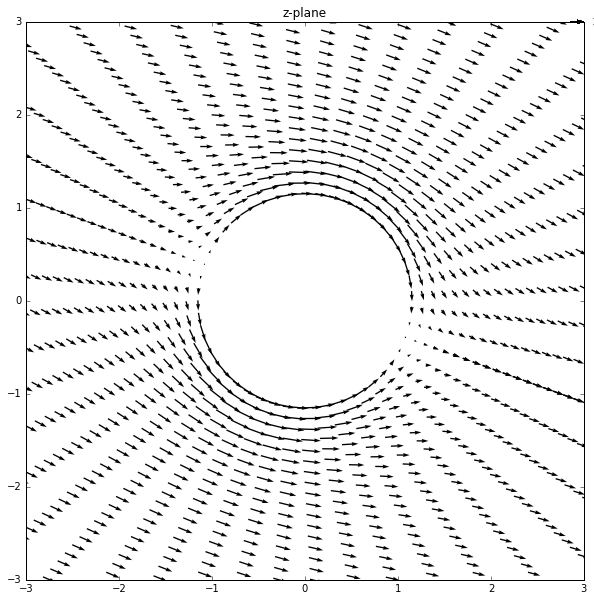

In [164]:
W = (U-1j*V)*cmath.exp(1j*AoA)
U_prime = W.real
V_prime = -W.imag
X_prime = (X - xc)*numpy.cos(AoA)+(Y-yc)*numpy.sin(AoA)
Y_prime = -(X-xc)*numpy.sin(AoA)+(Y-yc)*numpy.cos(AoA)


size = 10
pyplot.figure(figsize =(size,size))
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.title('z-plane')
Q = pyplot.quiver(X_prime[::3, ::3], Y_prime[::3, ::3], U_prime[::3, ::3], V_prime[::3, ::3],
               pivot='mid', scale_units='xy', scale=7)
qk = pyplot.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')